In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np
import math

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_score

from collections import defaultdict
import cPickle

import csv

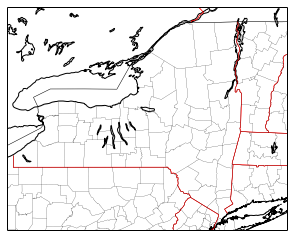

In [7]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='merc', lat_0=42.773, lon_0=-75.936,
   resolution = 'h', area_thresh = 0.1,
   llcrnrlon=-79.935, llcrnrlat=40.656,
   urcrnrlon=-71.94, urcrnrlat=45.317)

map.drawcoastlines()
map.drawcountries()
map.drawstates(linewidth=0.5, linestyle="solid", color="r", antialiased=1, ax=None, zorder=None)
map.drawcounties(linewidth=0.1,linestyle="solid", color="k", antialiased=1,
                ax=None, zorder=None, drawbounds=False)
#map.fillcontinents(color='coral')
map.drawmapboundary()

map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

plt.show()

In [8]:
with open('../pickles/NY_feature_df.p', 'rb') as f:
    NYtwitter = cPickle.load(f)

with open('../pickles/CT_feature_df.p', 'rb') as f:
    CTtwitter = cPickle.load(f)

[0, 6, 8, 21, 24, 31, 32, 36, 38, 39, 53, 54, 66, 67, 1, 2, 4, 13, 14, 27, 28, 40, 45, 47, 49, 52, 62, 63]


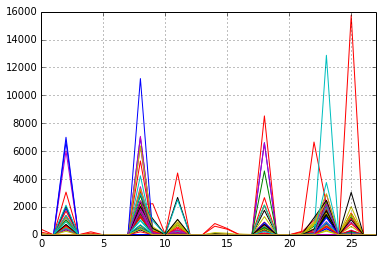

In [26]:
candidates = ["Clinton", "Sanders"]
X = []
colns = list(NYtwitter.columns.values)
ids = []
for c in candidates:
    ids += [i for i, coln in enumerate(colns) if c in coln]
print ids

if not X:
    X = [[] for i in range(len(NYtwitter))]
iterIdx= 0
for index, row in NYtwitter.iterrows():
    X[iterIdx] += list(row[ids].values)
    iterIdx += 1

df = pd.DataFrame(X)

for index, row in df.iterrows():
    row.plot(kind = 'line')
plt.show()

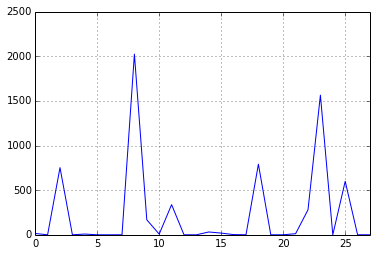

In [30]:
meanRow = df.apply(np.mean)
meanRow.plot(kind = 'line')
plt.show()